In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import mibian
import numpy as np

/Users/jteruya/.pyenv/versions/3.8.0/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Matlabplot Display Parameters

In [2]:
# Display Plot within Jupyter Notebook
%matplotlib inline
# Default Plot Size
plt.rcParams['figure.figsize'] = [10, 10]

## Load Vix Historical File
This file was loaded from [here](https://finance.yahoo.com/quote/%5EVIX/history/)

In [3]:
# Data File Location
vix_data = os.getenv('HOME') + '/Documents/platypus/vix/vix_20200509.csv'
# Load File into Dataframe
vix_df = pd.read_csv(vix_data)
# Convert Date Field to Datetime Object
vix_df['Date'] = pd.to_datetime(vix_df['Date'])
# Set Index to Date Field
vix_df.set_index(['Date'], inplace=True)

## Load Citi Historical File
This file was loaded from [here](https://finance.yahoo.com/quote/C/history?period1=1575849600&period2=1588982400&interval=1d&filter=history&frequency=1d)

In [4]:
# Data File Location
citi_data = os.getenv('HOME') + '/Documents/platypus/citi/citi_20200509.csv'
# Load File into Dataframe
citi_df = pd.read_csv(citi_data)
# Convert Date Field to Datetime Object
citi_df['Date'] = pd.to_datetime(citi_df['Date'])
# Set Index to Date Field
citi_df.set_index(['Date'], inplace=True)

## Calculate Historical Volatility
The historical volatility calculation was taken from [here](https://www.investopedia.com/ask/answers/021015/how-can-you-calculate-volatility-excel.asp)

In [5]:
def return_on_price(current_price, previous_price):
    return (current_price/previous_price) - 1

citi_df['Adj Close Shift'] = citi_df['Adj Close'].shift(1)
citi_df['Adj Close Price Return'] = citi_df.apply(lambda row : return_on_price(row['Adj Close'], row['Adj Close Shift']), axis = 1)
citi_df['Rolling Volatility'] = np.sqrt(30) * citi_df['Adj Close Price Return'].rolling(30).std() * 100

## Visualization of VIX and Citi

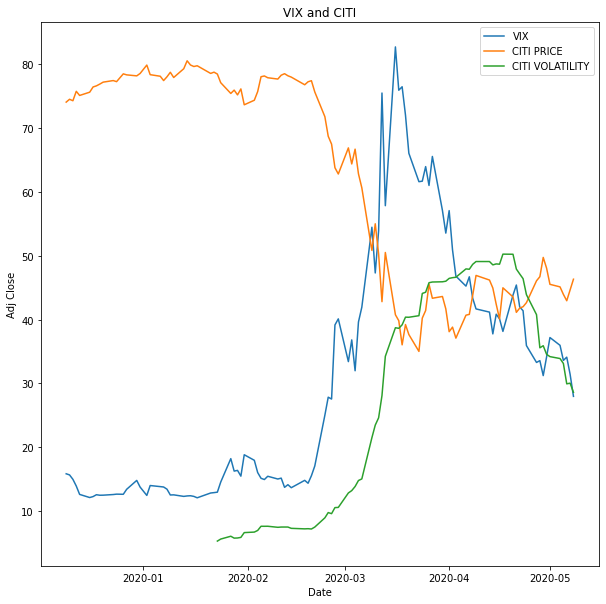

In [6]:
plt.plot(vix_df['Adj Close'], label="VIX")
plt.plot(citi_df['Adj Close'], label="CITI PRICE")
plt.plot(citi_df['Rolling Volatility'], label="CITI VOLATILITY")
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('VIX and CITI')
plt.legend()
plt.show()